Accuracy with 10 estimators: 0.8182
n_estimators=10, Accuracy=0.8182
n_estimators=20, Accuracy=0.8244
n_estimators=30, Accuracy=0.8310
n_estimators=40, Accuracy=0.8314
n_estimators=50, Accuracy=0.8327
n_estimators=60, Accuracy=0.8328
n_estimators=70, Accuracy=0.8334
n_estimators=80, Accuracy=0.8335
n_estimators=90, Accuracy=0.8329
n_estimators=100, Accuracy=0.8328
n_estimators=110, Accuracy=0.8332
n_estimators=120, Accuracy=0.8330
n_estimators=130, Accuracy=0.8330
n_estimators=140, Accuracy=0.8328
n_estimators=150, Accuracy=0.8329
n_estimators=160, Accuracy=0.8332
n_estimators=170, Accuracy=0.8331
n_estimators=180, Accuracy=0.8331
n_estimators=190, Accuracy=0.8330
n_estimators=200, Accuracy=0.8332

Best Accuracy: 0.8335 using 80 estimators


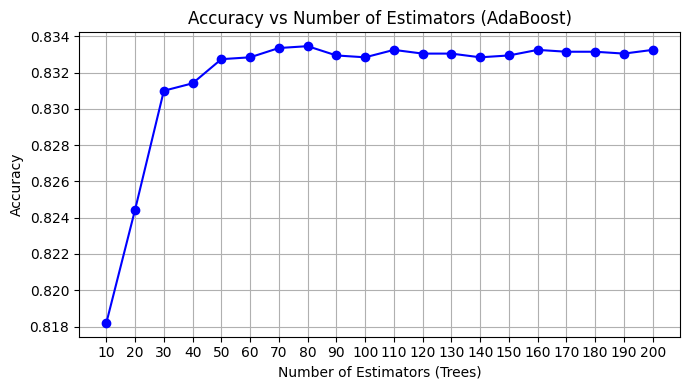

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Load dataset
df = pd.read_csv("/content/income.csv")

# Drop rows with missing values
df.dropna(inplace=True)

# Encode categorical columns
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Separate features and target
X = df.drop(columns=['income_level'], errors='ignore', axis=1)
y = df['income_level']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# AdaBoost with 10 estimators
model_10 = AdaBoostClassifier(n_estimators=10, random_state=42)
model_10.fit(X_train, y_train)
y_pred_10 = model_10.predict(X_test)
score_10 = accuracy_score(y_test, y_pred_10)
print(f"Accuracy with 10 estimators: {score_10:.4f}")

# Fine-tune number of estimators
best_score = 0
best_n = 0
estimators_range = list(range(10, 201, 10))
scores = []

for n in estimators_range:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    print(f"n_estimators={n}, Accuracy={score:.4f}")
    if score > best_score:
        best_score = score
        best_n = n

print(f"\nBest Accuracy: {best_score:.4f} using {best_n} estimators")

# Plot accuracy vs number of estimators
plt.figure(figsize=(7, 4))
plt.plot(estimators_range, scores, marker='o', linestyle='-', color='blue')
plt.title("Accuracy vs Number of Estimators (AdaBoost)")
plt.xlabel("Number of Estimators (Trees)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(estimators_range)
plt.tight_layout()
plt.show()
